In [7]:
import pandas as pd
import numpy as np
import scipy as sp
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

## Exploration and Analysis

In [3]:
advertising = pd.read_csv('data/advertising.csv')
advertising.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
# print the shape of the DataFrame
advertising.shape

(1000, 10)

In [6]:
advertising.info()
##types of features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [9]:
advertising.columns = advertising.columns.str.replace(' ', '')

In [10]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
DailyTimeSpentonSite    1000 non-null float64
Age                     1000 non-null int64
AreaIncome              1000 non-null float64
DailyInternetUsage      1000 non-null float64
AdTopicLine             1000 non-null object
City                    1000 non-null object
Male                    1000 non-null int64
Country                 1000 non-null object
Timestamp               1000 non-null object
ClickedonAd             1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [14]:
results = smf.ols('ClickedonAd ~ DailyTimeSpentonSite + Age + AreaIncome + DailyInternetUsage + Male', data=advertising).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ClickedonAd   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     931.2
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        00:16:52   Log-Likelihood:                 143.05
No. Observations:                1000   AIC:                            -274.1
Df Residuals:                     994   BIC:                            -244.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.3086      0.058     40.113      0.000       2.196       2.422
DailyTimeSpentonSite    -0.0128      0.001    -25.294      0.000      -0.014      -0.012
Age                      0.0090      0.001     10.845      0.000       0.007       0.011
AreaIncome           -6.173e-06   5.35e-07    -11.536      0.000   -7.22e-06   -5.12e-06
DailyInternetUsage      -0.0053      0.000    -28.169      0.000      -0.006      -0.005
Male                    -0.0293      0.013     -2.195      0.028      -0.055      -0.003
==============================================================================
Omnibus:                      304.139   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              989.285
Skew:                           1.478   Prob(JB):                    1.51e-215
Kurtosis:                       6.873   Cond. No.                     4.90e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

I would like to consider Age for building a model because it is the only variable which has positive correlation with Clicked On Ad and even though all other variables are stastically significant, Age is the only one with positive slope, all others are negative.
In addition, I did not use City, Country or AdTopicLine because they were more on the side of categorical and were not useful in linear regression

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b49c160>]],
      dtype=object)

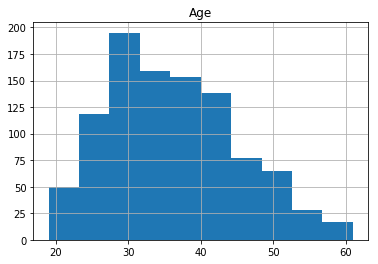

In [15]:
advertising.hist(column='Age')

In [16]:
df = pd.DataFrame()
df['Age'] = advertising['Age']
df['Area_Income'] = advertising['AreaIncome']

df.corr(method ='pearson')

,Age,Area_Income
Age,1.000000,-0.182605
Area_Income,-0.182605,1.000000


Text(0, 0.5, 'Age')

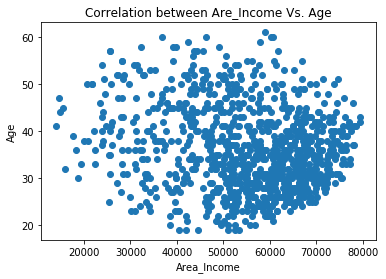

In [19]:
plt.scatter(df['Area_Income'],df['Age'])
plt.title('Correlation between Are_Income Vs. Age')
plt.xlabel('Area_Income')
plt.ylabel('Age')

I do not think there is a clear correlation between Area Income and Age of the users.

Text(0, 0.5, 'Daily Internet Usage')

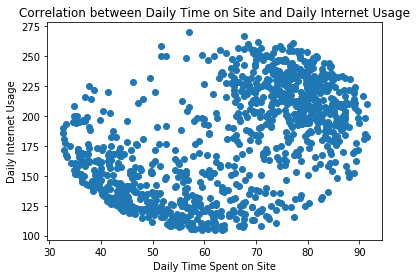

In [20]:
plt.scatter(advertising['DailyTimeSpentonSite'],advertising['DailyInternetUsage'])
plt.title('Correlation between Daily Time on Site and Daily Internet Usage')
plt.xlabel('Daily Time Spent on Site')
plt.ylabel('Daily Internet Usage')

## Modeling and Prediction

Question 1) It is a classification example, because we are prediciting categorical variable in answer of Yes or No. For example, would user click on the ad? Yes or No. It is not regression because we are not prediciting numerical figures. Even though in this case, the answer is 0 or 1, but that is also categorical.

In [21]:
advertising.shape

(1000, 10)

In [22]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
DailyTimeSpentonSite    1000 non-null float64
Age                     1000 non-null int64
AreaIncome              1000 non-null float64
DailyInternetUsage      1000 non-null float64
AdTopicLine             1000 non-null object
City                    1000 non-null object
Male                    1000 non-null int64
Country                 1000 non-null object
Timestamp               1000 non-null object
ClickedonAd             1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [38]:
x=advertising.drop(columns=['ClickedonAd', 'Timestamp', 'City', 'Country', 'AdTopicLine'])
x.head()
#Dropping the variable which I have to predict -> ClickedonAd
#Also dropping Timestamp because I do not need it for prediction
#As it did not really have correlation with the target variable
#Also dropping City, Country and Ad Topic Line because I do not need them

,DailyTimeSpentonSite,Age,AreaIncome,DailyInternetUsage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0


In [39]:
#Inserting clicked on Ad into an array -> target variable
y=advertising['ClickedonAd'].values
y[0:5]

array([0, 0, 0, 0, 0])

In [40]:
#splitting the dataset and I am assigning 80:20 ratio between testing and training
from sklearn.model_selection import train_test_split
#split dataset into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [42]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
y_predicted=model.predict(x_test)
y_predicted

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0])

In [44]:
model.predict_proba(x_test)

array([[8.50135933e-01, 1.49864067e-01],
       [8.70574486e-04, 9.99129426e-01],
       [4.54518133e-01, 5.45481867e-01],
       [2.19202669e-01, 7.80797331e-01],
       [9.79219343e-01, 2.07806567e-02],
       [1.60902028e-01, 8.39097972e-01],
       [4.02103438e-01, 5.97896562e-01],
       [9.86792600e-01, 1.32074003e-02],
       [8.06447731e-01, 1.93552269e-01],
       [1.14706646e-01, 8.85293354e-01],
       [2.46989856e-03, 9.97530101e-01],
       [1.28730093e-01, 8.71269907e-01],
       [2.24570963e-03, 9.97754290e-01],
       [9.67476928e-01, 3.25230724e-02],
       [5.68163269e-02, 9.43183673e-01],
       [5.08871360e-01, 4.91128640e-01],
       [8.93378461e-01, 1.06621539e-01],
       [3.76793503e-02, 9.62320650e-01],
       [9.14358188e-01, 8.56418123e-02],
       [1.37943777e-03, 9.98620562e-01],
       [9.62886333e-01, 3.71136666e-02],
       [6.39384554e-03, 9.93606154e-01],
       [9.87872940e-01, 1.21270597e-02],
       [1.06805024e-01, 8.93194976e-01],
       [8.877490

In [45]:
model.score(x_test, y_test)
#accuracy of my model

0.905

It looks like it is a very promising accuracy

In [46]:
#I want to try just with Age
z = pd.DataFrame()
z['Age']=advertising['Age']
z.head()

,Age
0,35
1,31
2,26
3,29
4,35


In [47]:
#Inserting clicked on Ad into an array -> target variable
w=advertising['ClickedonAd'].values
#split dataset into train and test data
z_train, z_test, w_train, w_test = train_test_split(z, w, test_size=0.2, random_state=1, stratify=y)
model_age = LogisticRegression()
model_age.fit(z_train, w_train)
w_pred=model.predict(x_test)
model_age.predict_proba(z_test)
model_age.score(z_test, w_test)

0.735

#### The accuracy of model drops in logistic regression when I only use Age variable to predict the model. So my conclusion is that I would use Age variable but all the other variables as well which are statiscally signficant

Question 4)

In [48]:
#I will keep the same test train data split for now and apply KNN and cross validation
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [49]:
#show first 5 model predictions on the test data
knn.predict(x_test)[0:5]
y_pred=knn.predict(x_test)

In [50]:
knn.score(x_test, y_test)

0.755

#### The accuracy of KNN classifier is actually very less than logitical regression model accuracy, I am going to now apply cross validation and see if the accuracy improve by change KNN neighbor

In [52]:

from sklearn.model_selection import cross_val_score

knn_cross_validation = KNeighborsClassifier(n_neighbors=3)

#training my model with cv of 10
cross_validation_scores = cross_val_score(knn_cross_validation, x, y, cv=10)

#print each cv score (accuracy) and average them
print(cross_validation_scores)
print('cross_validation_scores mean:{}'.format(np.mean(cross_validation_scores)))

[0.76 0.73 0.81 0.68 0.75 0.79 0.62 0.78 0.72 0.8 ]
cross_validation_scores mean:0.744


#### cross validation score is almost coming very close to KNN classifier accuracy as well, however, it has been improving the more we have been folding so in 10th time, the accuracy was 0.8 which was a lot better, now lets try with different values of K to find the best value of K

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':np.arange(1,50)}

knn = KNeighborsClassifier()
# building the same classifier with n-fold=10 for cross validation
knn_cv= GridSearchCV(knn,param_grid,cv=10)
knn_cv.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [54]:
knn_cv.best_score_

0.8

In [55]:
knn_cv.best_params_

{'n_neighbors': 1}

### According to KNN GridSearch and cross validation, the best value of K is 1 to get the most accuracy.

#### The difference between KNN Classifier and Cross Validation Grid Search is that in Grid Search we can not only do k-fold validation by selecting different data points for training and testing to give the data more exposure so it can learn efficiently and not overfit. However, with grid search and cross validation at the same time, it works efficiently by looping over different values of K to find the best tuning parameter, hence the best value of K for the best accuracy in KNN Classifier.

#### On the other hand, Logistic Regression model is regression but with symboid so it is used to predict classes, while KNN Classifier model works by identifying the closest neighbors to forecast predictions.